In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.concat(pd.read_excel("Dados/202002.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.drop(["Lançamento", "Unnamed: 15", "Serie", 'EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,03/02/2020,87012,EQU-8712,Consum,GASOLINA,20.000,89.81
1,03/02/2020,31093,AZL-3509,Abast,DIESEL,181.760,688.88
2,03/02/2020,79439,ATJ-8583,Abast,DIESEL,72.681,275.47
3,03/02/2020,79413,AHQ-1425,Abast,GASOLINA,39.620,177.90
4,03/02/2020,79452,BCC-4699,Abast,ETANOL,43.340,142.60
...,...,...,...,...,...,...,...
250,28/02/2020,79438,ASZ-7061,Abast,GASOLINA,6.650,29.87
251,28/02/2020,79470,BCD-6851,Abast,GASOLINA,44.871,201.48
252,29/02/2020,79449,AYE-7591,Abast,ETANOL,28.581,96.90
253,29/02/2020,79463,BCD-6524,Abast,GASOLINA,37.149,166.81


In [2]:
from pandas_profiling import ProfileReport

profile = df.profile_report(
      sort='ascending',
      vars={
          'num':{'low_categorical_threshold': 0},
          'cat':{
            'length':True,
            'unicode':False,
            'n_obs': 5,
          }
      }
)

profile.set_variable('variables.descriptions',
    {
      'files': 'Files in the filesystem',
      'datec': 'Creation date',
      'datem': 'Modification date',
    }
)

profile.to_file("Pandas_Profiling/201905-PP.html")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [3]:
from pivottablejs import pivot_ui

pivot_ui(df, outfile_path='PivottableJS/201905-PJS.html')

In [4]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

52.641615686274456

In [5]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
250,28/02/2020,79438,ASZ-7061,Abast,GASOLINA,6.650,29.87
193,21/02/2020,93014,ATW-9372,Abast,GASOLINA,6.860,30.81
151,18/02/2020,93009,ATW-9378,Abast,GASOLINA,7.120,31.98
188,21/02/2020,79435,ASZ-6991,Abast,GASOLINA,7.189,32.29
229,27/02/2020,79438,ASZ-7061,Abast,GASOLINA,7.290,32.74
...,...,...,...,...,...,...,...
1,03/02/2020,31093,AZL-3509,Abast,DIESEL,181.760,688.88
137,17/02/2020,79474,EQU-4283,Abast,DIESEL,189.029,716.43
138,17/02/2020,79479,BDL0C63,Abast,DIESEL,189.480,718.14
127,14/02/2020,79476,BDI4E74,Abast,DIESEL,204.650,775.63


In [6]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
238,28/02/2020,79474,EQU-4283,Abast,DIESEL,269.230,993.47
127,14/02/2020,79476,BDI4E74,Abast,DIESEL,204.650,775.63
138,17/02/2020,79479,BDL0C63,Abast,DIESEL,189.480,718.14
137,17/02/2020,79474,EQU-4283,Abast,DIESEL,189.029,716.43
1,03/02/2020,31093,AZL-3509,Abast,DIESEL,181.760,688.88
234,27/02/2020,79476,BDI4E74,Abast,DIESEL,178.250,657.75
212,26/02/2020,79479,BDL0C63,Abast,DIESEL,177.710,655.76
56,07/02/2020,31102,AZR-9543,Abast,DIESEL,176.609,669.36
254,29/02/2020,79479,BDL0C63,Abast,DIESEL,175.309,646.90
77,10/02/2020,79474,EQU-4283,Abast,DIESEL,174.821,662.58


In [7]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.


In [8]:
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']

In [9]:
# Check if there is a vehicle that uses 'ETANOL' and 'DIESEL'
dfc = dfd.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft

,,Valor Abast.,Nr Litros
Placa,Produto,,


In [10]:
# Check if there is a vehicle that uses 'GASOLINA' and 'DIESEL'
dfc = dfd.merge(dfg['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})

In [41]:
# Check if there is vehicles that use 'GASOLINA' and 'ETANOL'
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']
dfc = dfg.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dft = dfc.groupby(['Placa', 'Produto']).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft['Valor Litro'] = dft['Valor Abast.'] / dft['Nr Litros']
dft['Valor Litro'] = dft['Valor Litro'].round(2)
dft = dft.reset_index()
dft

,Placa,Produto,Valor Abast.,Nr Litros,Valor Litro
0,ARV-7211,ETANOL,281.25,85.481,3.29
1,ARV-7211,GASOLINA,193.93,43.189,4.49
2,ARV-7425,ETANOL,360.32,109.512,3.29
3,ARV-7425,GASOLINA,201.08,44.780,4.49
4,ATL-9829,ETANOL,299.35,90.982,3.29
5,ATL-9829,GASOLINA,236.36,52.639,4.49
6,ATL-9841,ETANOL,300.60,91.361,3.29
7,ATL-9841,GASOLINA,178.67,39.791,4.49
8,ATL-9887,ETANOL,426.05,129.490,3.29
9,ATL-9887,GASOLINA,352.40,78.481,4.49


[Text(0.5, 1.0, 'Placa x Número de Litros 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Número de Litros')]

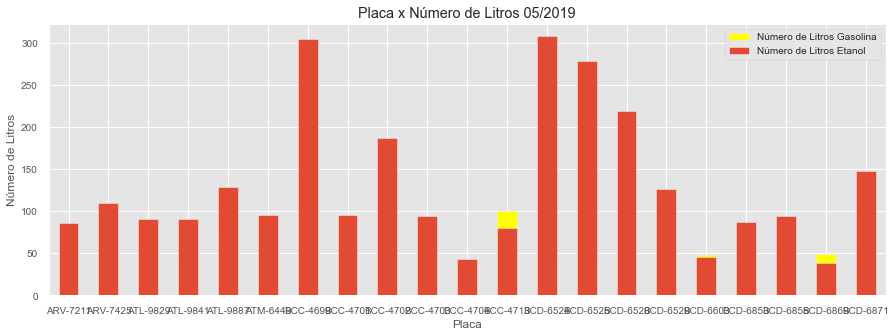

In [13]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(15, 5), color=("yellow"))
dftpe.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(15, 5))

#set limits and labels
#avggas = dftpg["Valor Litro"].mean()
#ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
#avgeta = dftpg["Valor Litro"].mean()
#ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
ax.legend(["Número de Litros Gasolina", "Número de Litros Etanol", "Valor por Litro Gasolina"])
ax.set(title='Placa x Número de Litros 05/2019', xlabel='Placa', ylabel='Número de Litros')

<AxesSubplot:xlabel='Placa'>

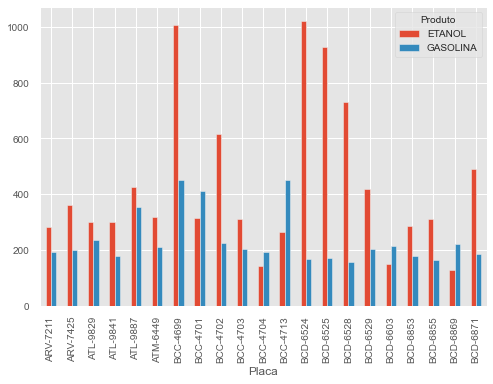

In [14]:
dft.groupby(['Placa', 'Produto'])['Valor Abast.'].mean().unstack().plot.bar()

<AxesSubplot:xlabel='Placa'>

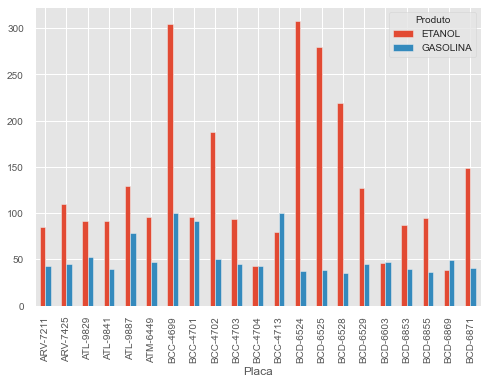

In [15]:
dft.groupby(['Placa', 'Produto'])['Nr Litros'].mean().unstack().plot.bar()

[Text(0.5, 1.0, 'Placa x Valor por Litro 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

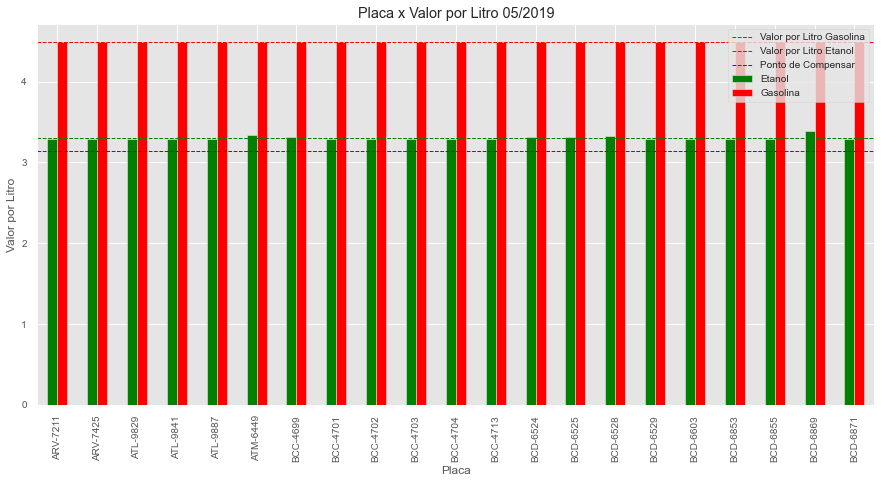

In [16]:
fig, ax = plt.subplots()
dft.groupby(['Placa', 'Produto'])['Valor Litro'].mean().unstack().plot(kind="bar", ax=ax, color=['g', 'r'],figsize=(15,7))

avggas = dftpg["Valor Litro"].mean()
ax.axhline(avggas, color='r', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axhline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axhline(worthGas, color='purple', label='Média', linestyle='--', linewidth=1)
ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Etanol', 'Gasolina'])
ax.set(title='Placa x Valor por Litro 05/2019', xlabel='Placa', ylabel='Valor por Litro')

[Text(0.5, 1.0, 'Placa x Valor por Litro 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

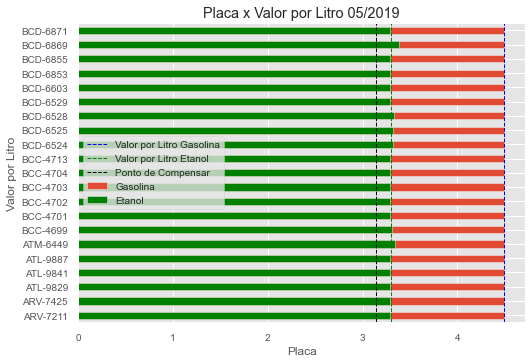

In [17]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax,)
dftpe.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax, color='green')

#set limits and labels
avggas = dftpg["Valor Litro"].mean()
ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axvline(worthGas, color='black', label='Média', linestyle='--', linewidth=1)

ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Gasolina', 'Etanol'])
ax.set(title='Placa x Valor por Litro 05/2019', xlabel='Placa', ylabel='Valor por Litro')
#ax1.legend(["Valor por Litro Gasolina", "Número de Litros Etanol"])
#ax1.set(title='Placa x Número de Litros 05/2019 Etanol', xlabel='Placa', ylabel='Número de Litros')

In [18]:
df["Produto"].value_counts()

GASOLINA    105
ETANOL       93
DIESEL       57
Name: Produto, dtype: int64

In [19]:
avgeta = dftpe["Valor Litro"].mean()
avgeta

3.302857142857143

In [20]:
df["Produto"].value_counts(normalize=True)

GASOLINA    0.411765
ETANOL      0.364706
DIESEL      0.223529
Name: Produto, dtype: float64

<AxesSubplot:title={'center':'Nr Litros'}, ylabel='Frequency'>

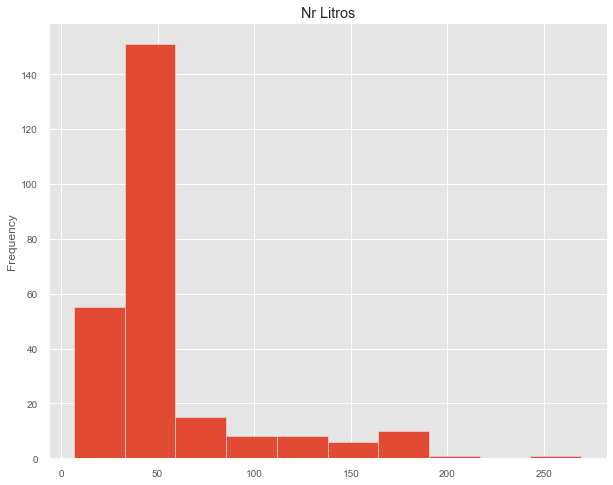

In [21]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

<AxesSubplot:title={'center':'Valor Abastecido'}, ylabel='Frequency'>

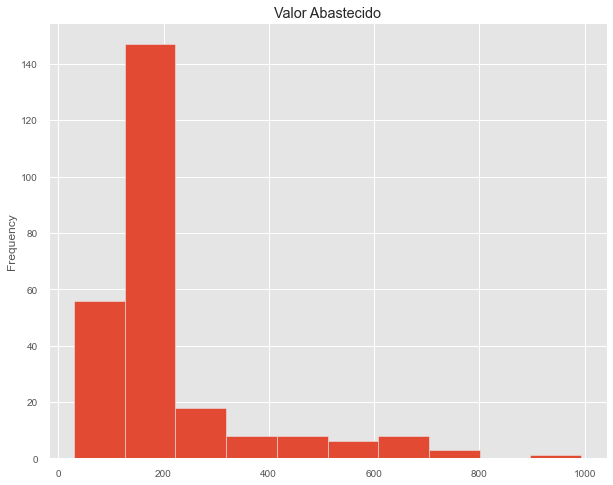

In [22]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [23]:
df["Nr Litros"].describe()

count    255.000000
mean      52.641616
std       41.532456
min        6.650000
25%       34.655000
50%       42.310000
75%       48.830500
max      269.230000
Name: Nr Litros, dtype: float64

<AxesSubplot:>

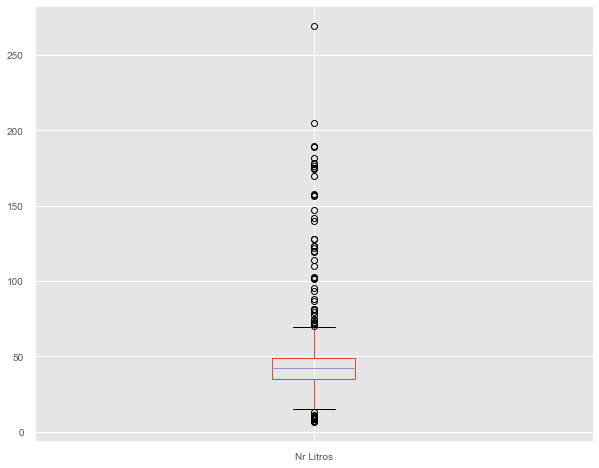

In [24]:
df["Nr Litros"].plot(kind="box")

<AxesSubplot:title={'center':'Valor Abast. x Nr Litros'}, xlabel='Valor Abast.', ylabel='Nr Litros'>

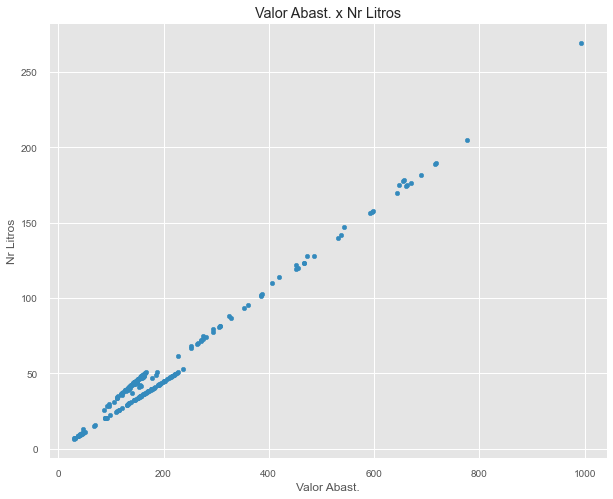

In [25]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

<AxesSubplot:title={'center':'Nr Litros'}, xlabel='Produto'>

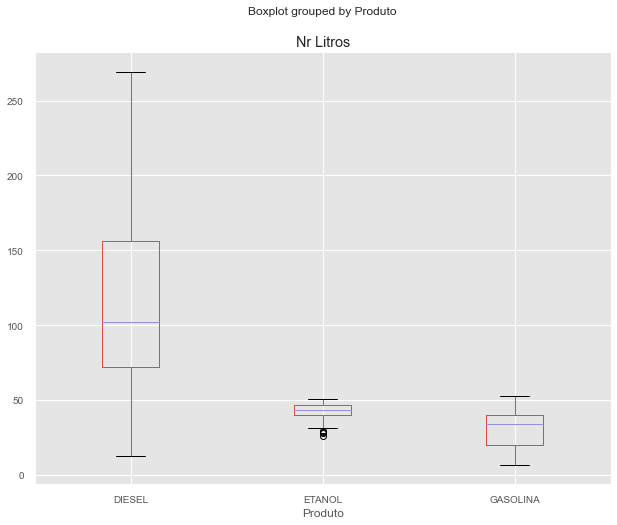

In [26]:
df.boxplot(column="Nr Litros", by="Produto")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Data'>

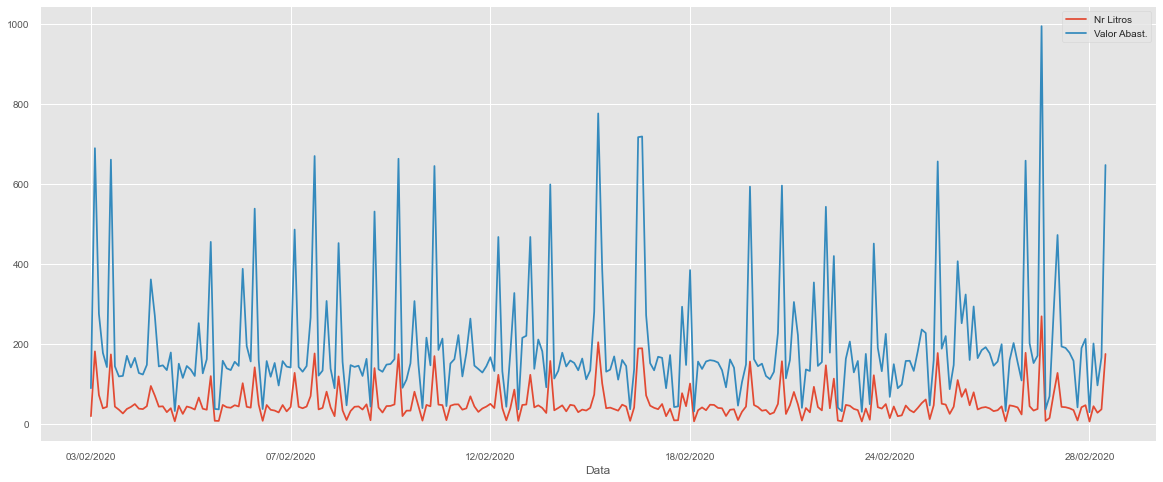

In [27]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

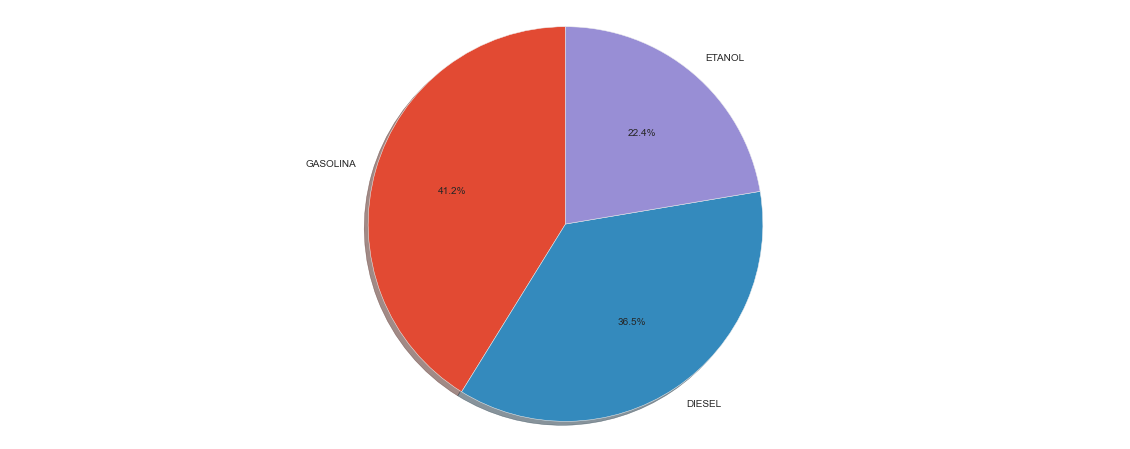

In [28]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

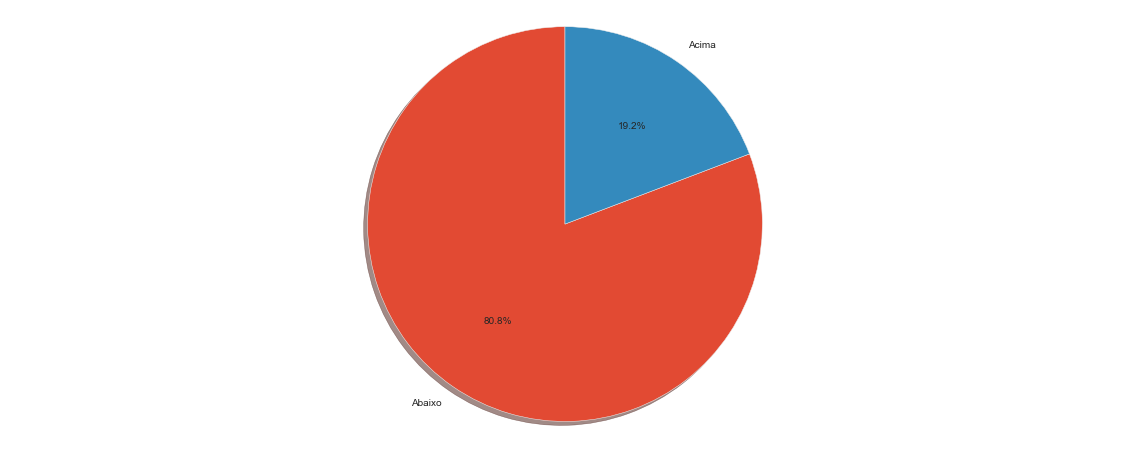

In [29]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

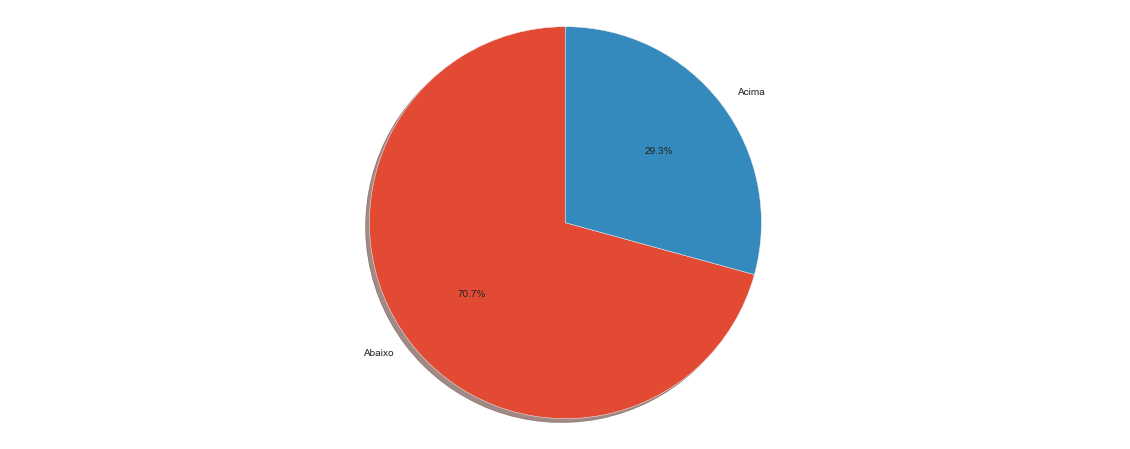

In [30]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

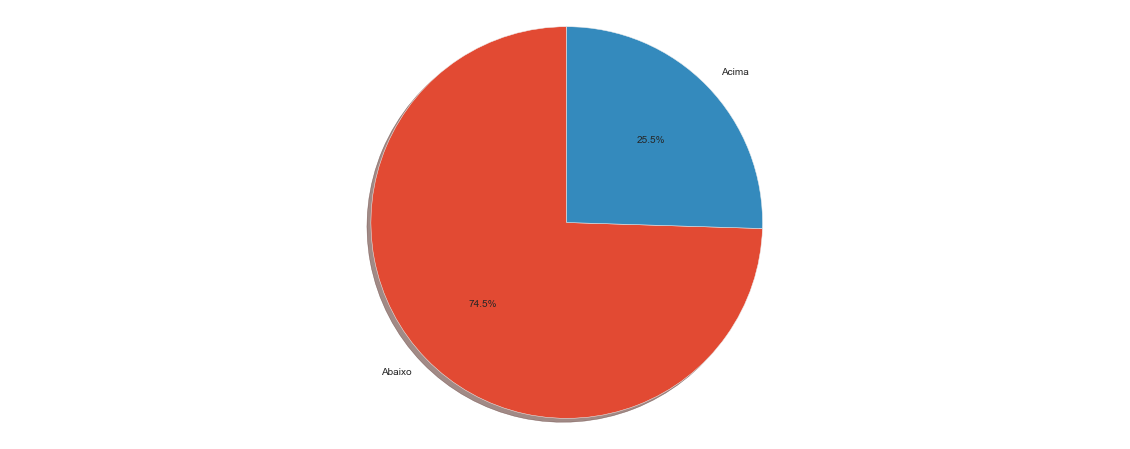

In [31]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


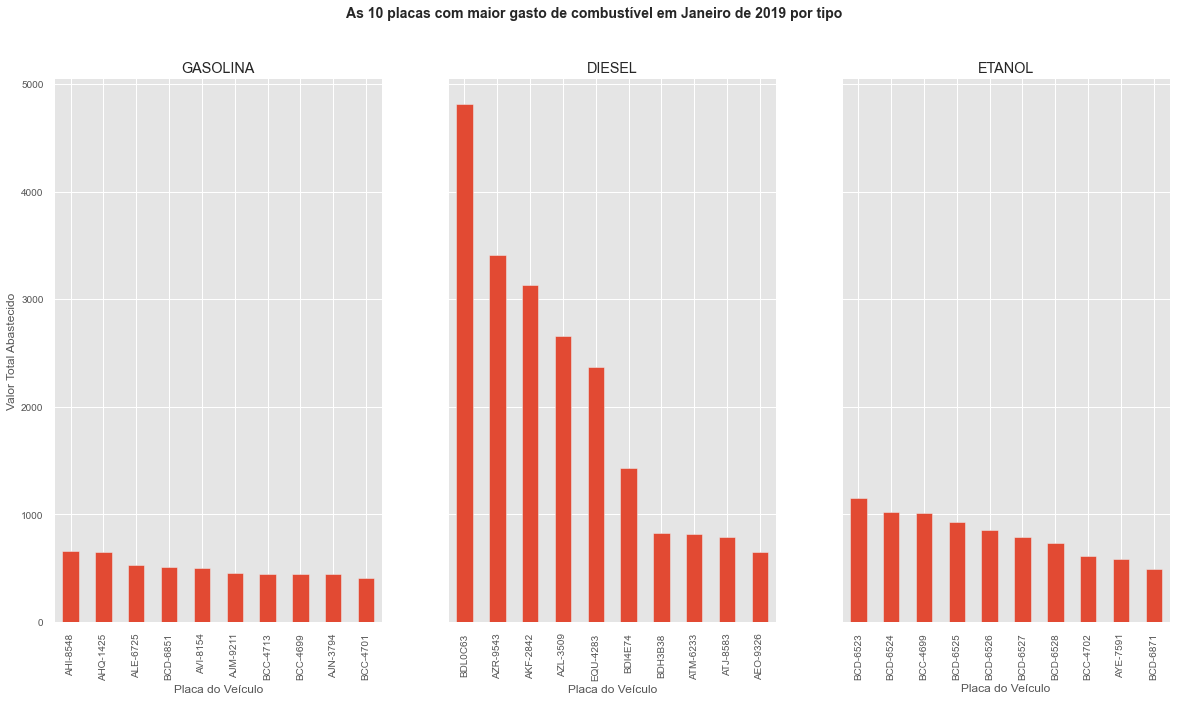

In [32]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]
#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot the data and get the average
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))
#plot GASOLINA
top_10_g.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='GASOLINA', xlabel='Placa do Veículo', ylabel='Valor Total Abastecido')
#plot DIESEL
top_10_d.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax1)
ax1.set(title='DIESEL', xlabel='Placa do Veículo', ylabel='')
#plot ETANOL
top_10_e.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax2)
ax2.set(title='ETANOL', xlabel='Placa do Veículo', ylabel='')

#set limits and labels
#ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', xlabel='Placa do Veículo', ylabel='Valor Abastecido Total')
fig.suptitle('As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', fontsize=14, fontweight='bold')
    
#hide the legend
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


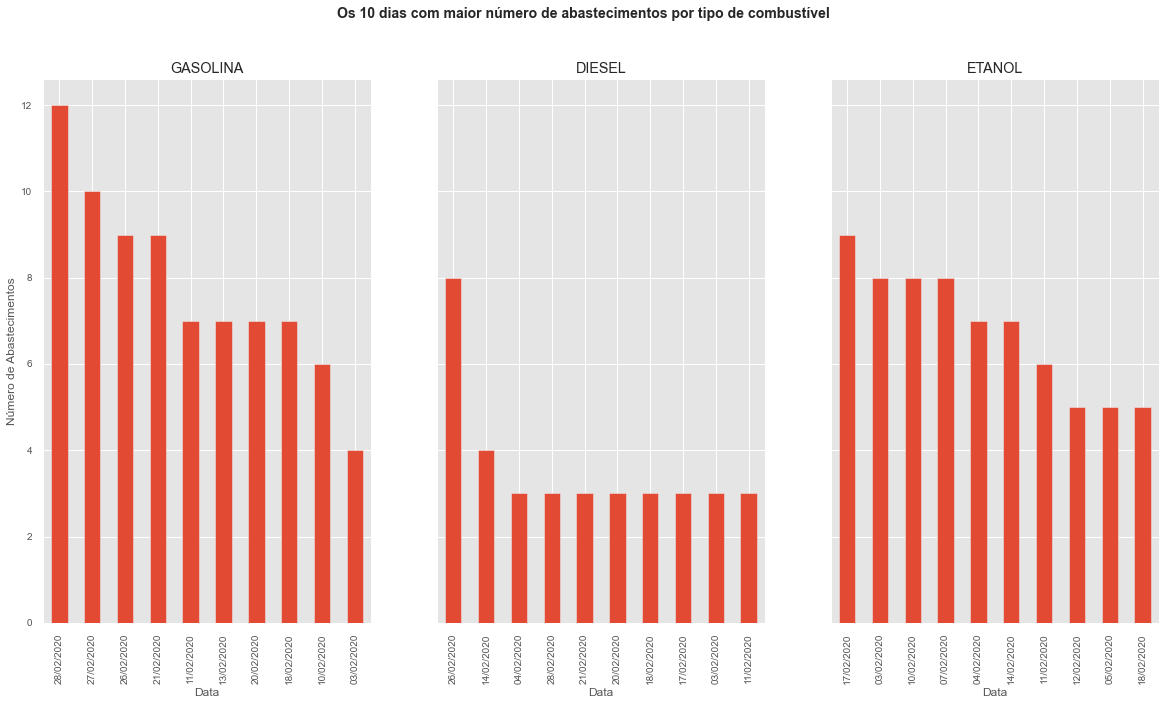

In [33]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))

#plot GASOLINA
top_10_g.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax0)
ax0.set(title="GASOLINA", xlabel='Data', ylabel='Número de Abastecimentos')

#plot DIESEL
top_10_d.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax1)
ax1.set(title="DIESEL", xlabel='Data', ylabel='')

#plot ETANOL
top_10_e.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax2)
ax2.set(title="ETANOL", xlabel='Data', ylabel='')

#set limits and labels
fig.suptitle('Os 10 dias com maior número de abastecimentos por tipo de combustível', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


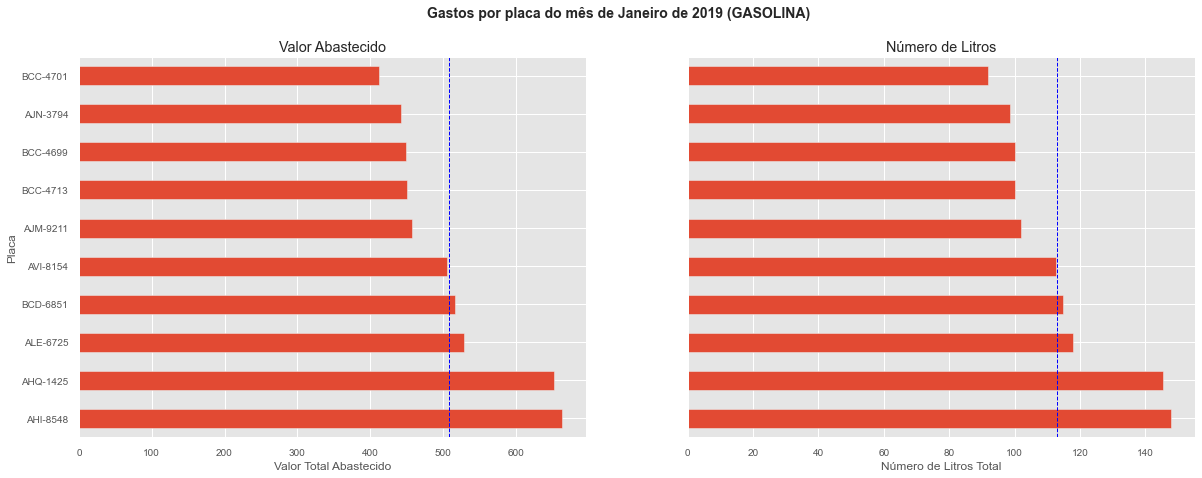

In [34]:
#get the figure and the axes
top_10 = df[df["Produto"] == "GASOLINA"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (GASOLINA)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


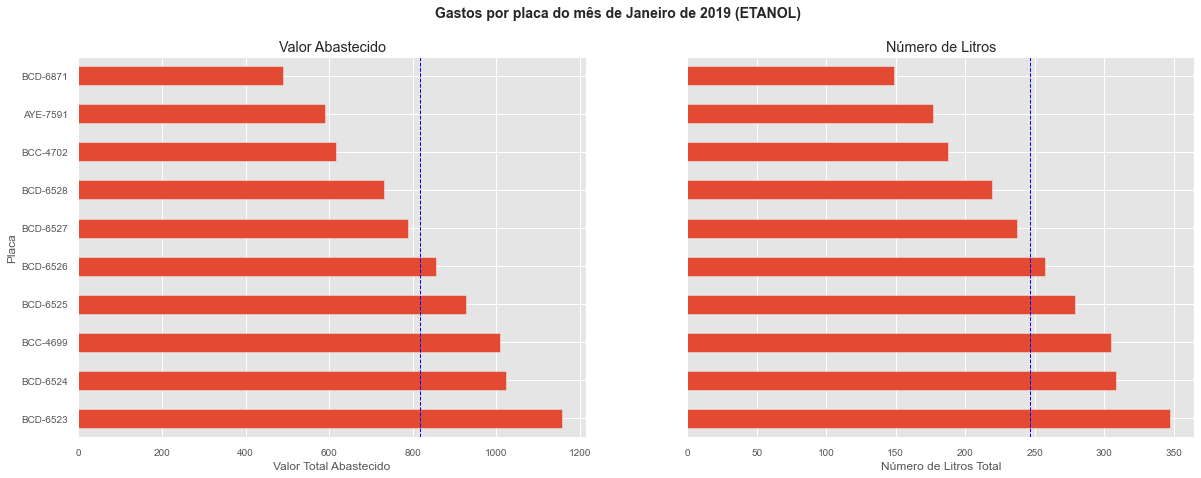

In [35]:
#get the figure and the axes
top_10 = df[df["Produto"] == "ETANOL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (ETANOL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


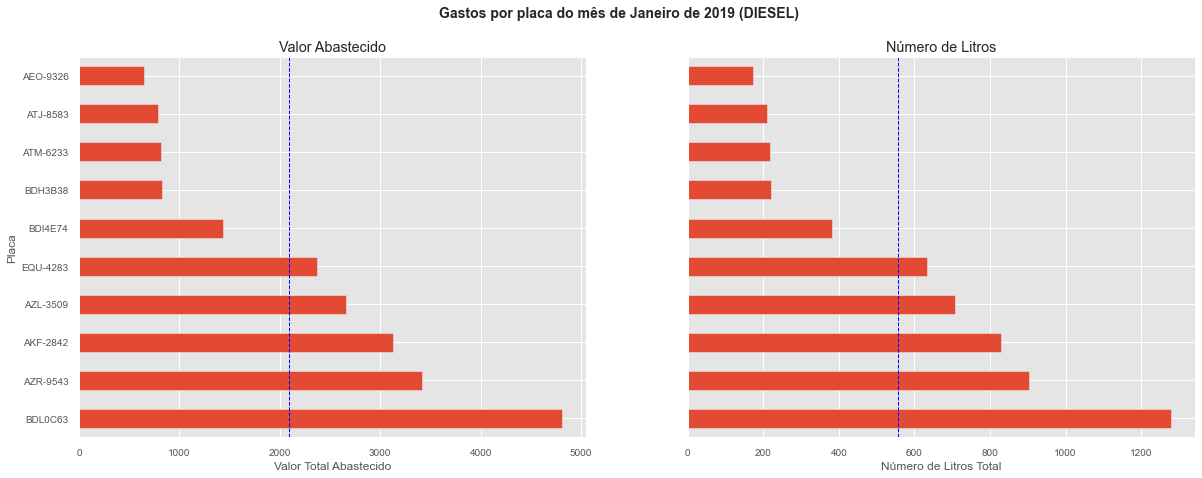

In [36]:
#get the figure and the axes
top_10 = df[df["Produto"] == "DIESEL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (DIESEL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


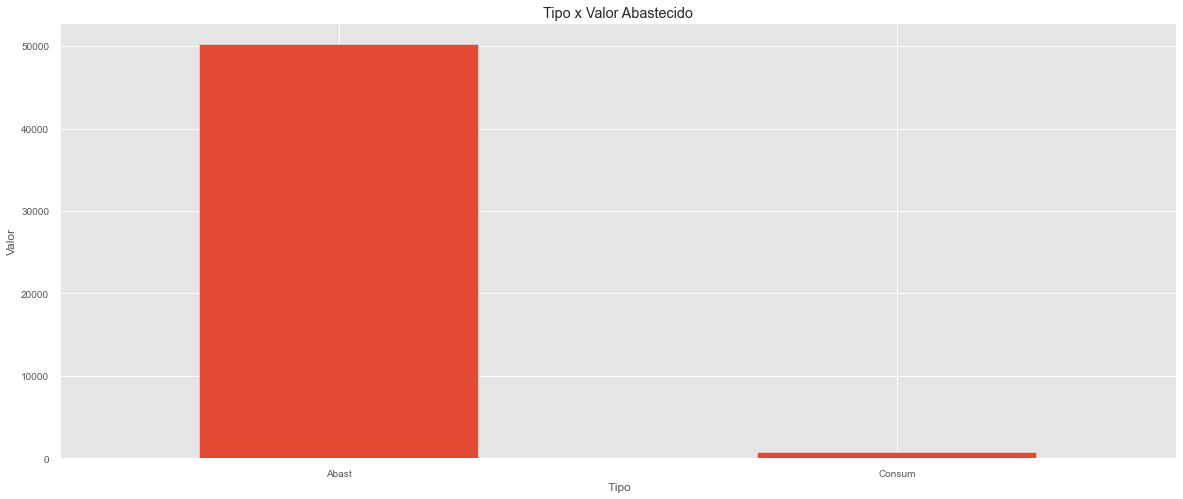

In [37]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


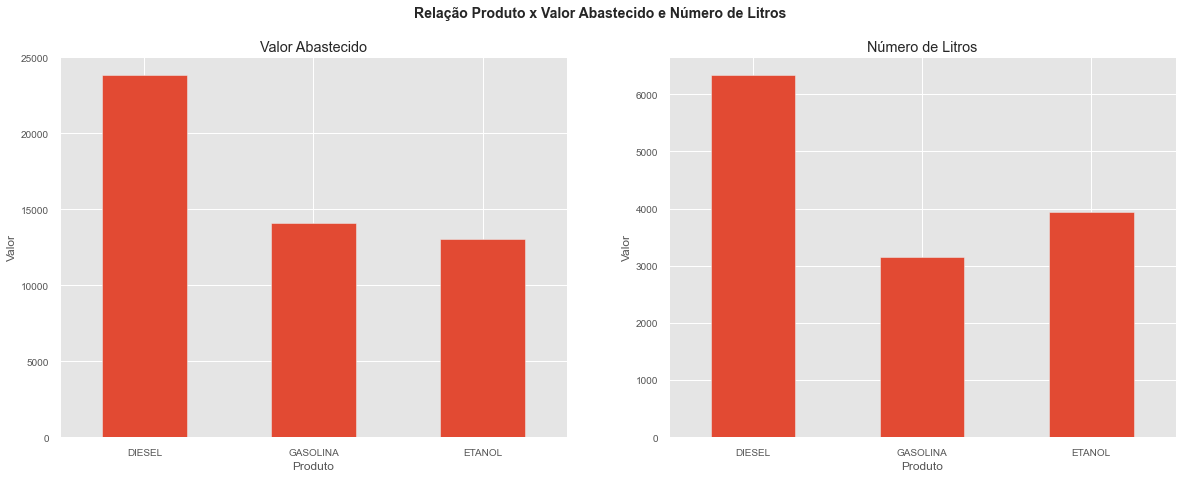

In [38]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


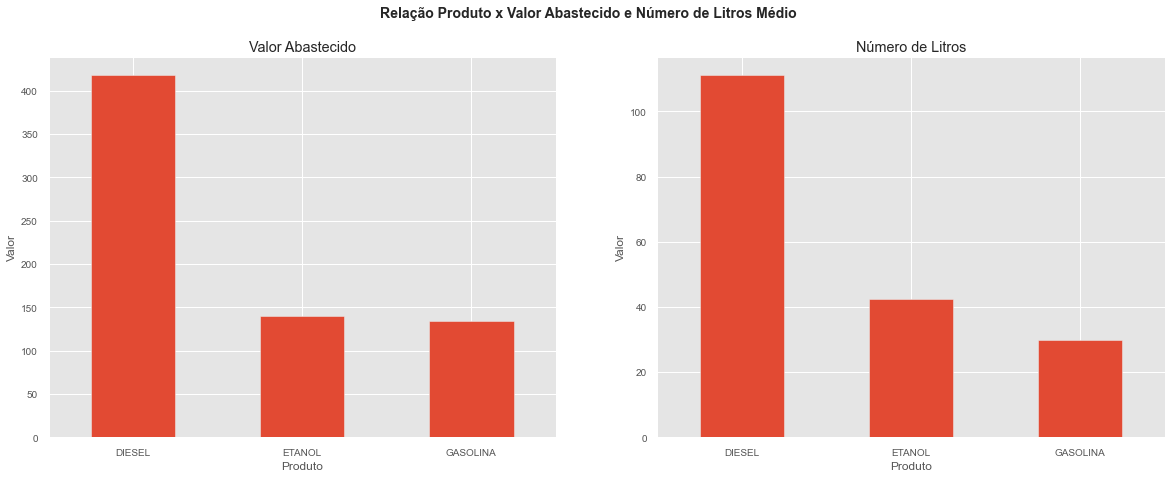

In [39]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


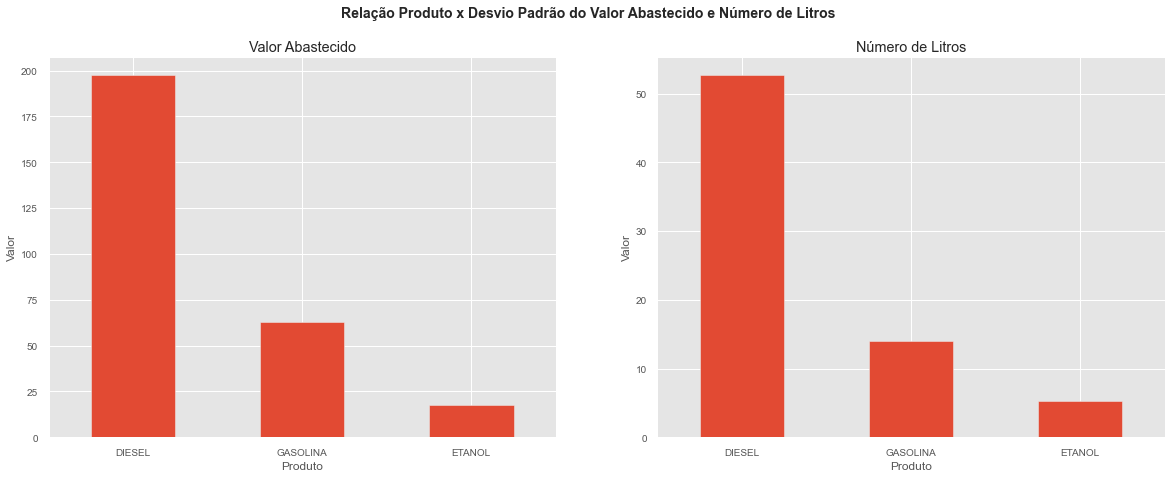

In [40]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)